# ITS307 Data Analytics : Spring Semester 2022
# Assignment 3 [20 Marks]

# Supervised Learning: Classification

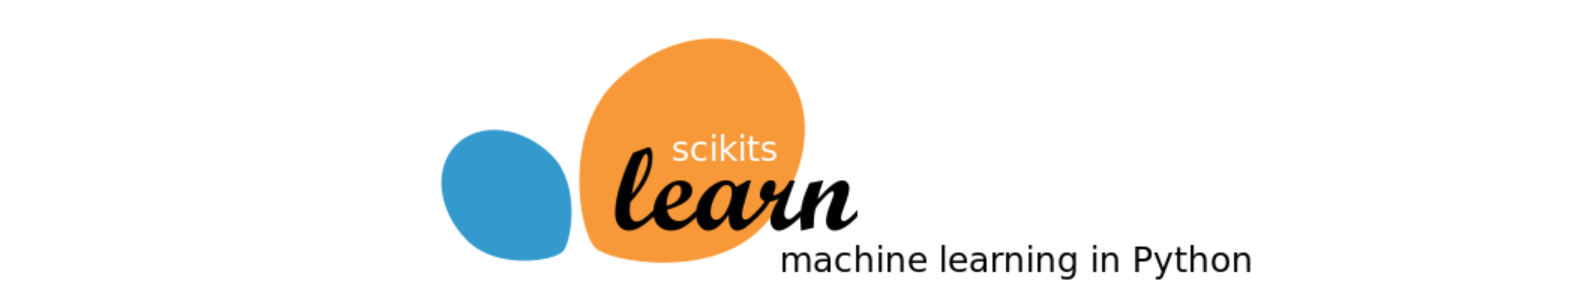

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For the purpose of this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this test, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd
import numpy as np

# 2. Loading and Cleaning Data with Pandas [3 M]


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [2]:
df = pd.read_table("creditcard.txt", delimiter = ",", names=["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income","ApprovalStatus"])
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [3]:
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
685           1.25            f        f            0              f       g   
686           2.00            f        t            2              t       g   
687           2.00            f        t            1              t       g   
688           0.04            f        f            0              f       g   
689           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

## 2.2.  Print summary of the dataset

In [4]:
df.describe()

Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000

In [5]:
df.shape

(690, 16)

## 2.3. Check null values for all the colums in the dataset

In [6]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [7]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [8]:
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [9]:
df['Age'] = df['Age'].replace("?", np.nan)
df['ZipCode'] = df['ZipCode'].replace("?", np.nan)

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [10]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [11]:
df.Age = df.Age.astype("float")
df.ZipCode = df.ZipCode.astype("float")

In [12]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values [3 M]

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [13]:
categorical_features = ['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen']
categoricaldf = df[categorical_features]
categoricaldf.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen  
0              f       g  
1              f       g  
2              f       g  
3              t       g  
4              f       s

In [14]:
numerical_features = ['Age','Debt','YearsEmployed','CreditScore','ZipCode','Income']
numericaldf = df[numerical_features]
numericaldf.head()

Age   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25            1    202.0       0
1  58.67  4.460           3.04            6     43.0     560
2  24.50  0.500           1.50            0    280.0     824
3  27.83  1.540           3.75            5    100.0       3
4  20.17  5.625           1.71            0    120.0       0

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [15]:
categoricaldf.isna().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [16]:
numericaldf.isna().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

In [17]:
print(numericaldf.Age.mode())
print(numericaldf.ZipCode.median())

0    22.67
dtype: float64
160.0


In [18]:
numericaldf['Age'].fillna(value=22.67, inplace=True)
numericaldf['ZipCode'].fillna(value=160.0, inplace=True)

C:\Users\Cheki\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
numericaldf.isna().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

# 4. Scaling Numerical Features[1.5]
- Use any scaling techniques to scale all the numerical features

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numerical = scaler.fit_transform(numericaldf)

In [21]:
#Dataframe before scaling
numericaldf.head()

Age   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25            1    202.0       0
1  58.67  4.460           3.04            6     43.0     560
2  24.50  0.500           1.50            0    280.0     824
3  27.83  1.540           3.75            5    100.0       3
4  20.17  5.625           1.71            0    120.0       0

In [22]:
#dataframe after scaling
transformed_numeric_df = pd.DataFrame(data=numerical,columns=numerical_features)
transformed_numeric_df.head()

Age      Debt  YearsEmployed  CreditScore  ZipCode   Income
0  0.256842  0.000000       0.043860     0.014925   0.1010  0.00000
1  0.675489  0.159286       0.106667     0.089552   0.0215  0.00560
2  0.161654  0.017857       0.052632     0.000000   0.1400  0.00824
3  0.211729  0.055000       0.131579     0.074627   0.0500  0.00003
4  0.096541  0.200893       0.060000     0.000000   0.0600  0.00000

# 5. Encode Categorical data[2.5 M]
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [23]:
categoricaldf.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen  
0              f       g  
1              f       g  
2              f       g  
3              t       g  
4              f       s

In [24]:
#Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder =  OrdinalEncoder()
categoricaldf['Gender'] = ordinal_encoder.fit_transform(df[['Gender']])
categoricaldf['Married'] = ordinal_encoder.fit_transform(df[['Married']])
categoricaldf['BankCustomer'] = ordinal_encoder.fit_transform(df[['BankCustomer']])
categoricaldf['EducationLevel'] = ordinal_encoder.fit_transform(df[['EducationLevel']])
categoricaldf['Ethnicity'] = ordinal_encoder.fit_transform(df[['Ethnicity']])
categoricaldf['PriorDefault'] = ordinal_encoder.fit_transform(df[['PriorDefault']])
categoricaldf['Employed'] = ordinal_encoder.fit_transform(df[['Employed']])
categoricaldf['DriversLicense'] = ordinal_encoder.fit_transform(df[['DriversLicense']])
categoricaldf['Citizen'] = ordinal_encoder.fit_transform(df[['Citizen']])
categoricaldf.head()

C:\Users\Cheki\AppData\Local\Temp/ipykernel_10636/2261389155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricaldf['Gender'] = ordinal_encoder.fit_transform(df[['Gender']])
C:\Users\Cheki\AppData\Local\Temp/ipykernel_10636/2261389155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricaldf['Married'] = ordinal_encoder.fit_transform(df[['Married']])
C:\Users\Cheki\AppData\Local\Temp/ipykernel_10636/2261389155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0     2.0      2.0           1.0            13.0        8.0           1.0   
1     1.0      2.0           1.0            11.0        4.0           1.0   
2     1.0      2.0           1.0            11.0        4.0           1.0   
3     2.0      2.0           1.0            13.0        8.0           1.0   
4     2.0      2.0           1.0            13.0        8.0           1.0   

   Employed  DriversLicense  Citizen  
0       1.0             0.0      0.0  
1       1.0             0.0      0.0  
2       0.0             0.0      0.0  
3       1.0             1.0      0.0  
4       0.0             0.0      2.0

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
df['ApprovalStatus'] = label_encoder.fit_transform(df.ApprovalStatus)
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income  ApprovalStatus  
0    202.0       0               0  
1     43.0     560               0  
2    280.0     824               0  
3    100.0       3               0  
4    120.0       0               0

In [26]:
y = df.ApprovalStatus
y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: ApprovalStatus, Length: 690, dtype: int32

In [27]:
x = pd.concat([categoricaldf, transformed_numeric_df], axis = 1, join='inner')
x

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       2.0      2.0           1.0            13.0        8.0           1.0   
1       1.0      2.0           1.0            11.0        4.0           1.0   
2       1.0      2.0           1.0            11.0        4.0           1.0   
3       2.0      2.0           1.0            13.0        8.0           1.0   
4       2.0      2.0           1.0            13.0        8.0           1.0   
..      ...      ...           ...             ...        ...           ...   
685     2.0      3.0           3.0             5.0        4.0           0.0   
686     1.0      2.0           1.0             2.0        8.0           0.0   
687     1.0      3.0           3.0             6.0        3.0           0.0   
688     2.0      2.0           1.0             1.0        8.0           0.0   
689     2.0      2.0           1.0             2.0        4.0           0.0   

     Employed  DriversLicense  Citizen       Age      Debt  YearsEmployed  \
0         1.0             0.0      0.0  0.256842  0.000000       0.043860   
1         1.0             0.0      0.0  0.675489  0.159286       0.106667   
2         0.0             0.0      0.0  0.161654  0.017857       0.052632   
3         1.0             1.0      0.0  0.211729  0.055000       0.131579   
4         0.0             0.0      2.0  0.096541  0.200893       0.060000   
..        ...             ...      ...       ...       ...            ...   
685       0.0             0.0      0.0  0.110226  0.360179       0.043860   
686       1.0             1.0      0.0  0.134135  0.026786       0.070175   
687       1.0             1.0      0.0  0.172932  0.482143       0.070175   
688       0.0             0.0      0.0  0.062707  0.007321       0.001404   
689       0.0             1.0      0.0  0.319549  0.120536       0.290877   

     CreditScore  ZipCode   Income  
0       0.014925   0.1010  0.00000  
1       0.089552   0.0215  0.00560  
2       0.000000   0.1400  0.00824  
3       0.074627   0.0500  0.00003  
4       0.000000   0.0600  0.00000  
..           ...      ...      ...  
685     0.000000   0.1300  0.00000  
686     0.029851   0.1000  0.00394  
687     0.014925   0.1000  0.00001  
688     0.000000   0.1400  0.00750  
689     0.000000   0.0000  0.00000  

[690 rows x 15 columns]

# 6. Training Model [3 M]

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [30]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(xtrain, ytrain)

LinearRegression()

In [31]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(xtrain, ytrain)

RandomForestRegressor()

In [32]:
#Logistic 
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(xtrain,ytrain)

C:\Users\Cheki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 7. Evaluating the model [3 M]

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.

In [33]:
model.score(xtrain, ytrain)

0.6092137596931552

In [34]:
model.score(xtest, ytest)

0.5220516016322763

In [35]:
model1.score(xtrain,ytrain)

0.9471157659811892

In [36]:
model1.score(xtest, ytest)

0.5170499467745369

In [37]:
model2.score(xtrain,ytrain)

0.8695652173913043

In [38]:
model2.score(xtest,ytest)

0.8333333333333334

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [48]:
y_pred = model2.predict(x)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

# 8. Making Prediction [2 M]
- Take any sample record from your training data and make prediction.

In [51]:
x.head()

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0     2.0      2.0           1.0            13.0        8.0           1.0   
1     1.0      2.0           1.0            11.0        4.0           1.0   
2     1.0      2.0           1.0            11.0        4.0           1.0   
3     2.0      2.0           1.0            13.0        8.0           1.0   
4     2.0      2.0           1.0            13.0        8.0           1.0   

   Employed  DriversLicense  Citizen       Age      Debt  YearsEmployed  \
0       1.0             0.0      0.0  0.256842  0.000000       0.043860   
1       1.0             0.0      0.0  0.675489  0.159286       0.106667   
2       0.0             0.0      0.0  0.161654  0.017857       0.052632   
3       1.0             1.0      0.0  0.211729  0.055000       0.131579   
4       0.0             0.0      2.0  0.096541  0.200893       0.060000   

   CreditScore  ZipCode   Income  
0     0.014925   0.1010  0.00000  
1     0.089552   0.0215  0.00560  
2     0.000000   0.1400  0.00824  
3     0.074627   0.0500  0.00003  
4     0.000000   0.0600  0.00000

In [54]:
x_sample.reshape(-1,1)
model.predict(x_sample)

AttributeError: 'list' object has no attribute 'reshape'

In [42]:
model1.predict(xtrain)

array([0.18, 0.05, 1.  , 0.11, 1.  , 0.87, 0.02, 1.  , 1.  , 0.97, 0.7 ,
       0.8 , 0.08, 1.  , 0.05, 0.98, 0.94, 0.98, 0.91, 1.  , 0.9 , 0.83,
       0.11, 0.06, 0.13, 1.  , 0.63, 1.  , 0.25, 0.71, 0.03, 0.89, 1.  ,
       1.  , 0.8 , 0.67, 0.  , 0.03, 1.  , 1.  , 1.  , 0.8 , 0.08, 1.  ,
       1.  , 1.  , 0.14, 0.79, 0.1 , 0.98, 0.02, 0.  , 0.97, 0.02, 0.1 ,
       1.  , 0.77, 0.2 , 1.  , 0.01, 0.99, 0.08, 1.  , 1.  , 1.  , 0.31,
       0.91, 0.01, 0.01, 0.95, 0.87, 0.16, 0.98, 0.09, 1.  , 0.97, 1.  ,
       1.  , 0.98, 1.  , 0.35, 0.01, 0.58, 1.  , 0.03, 0.  , 0.06, 0.01,
       0.05, 1.  , 1.  , 0.89, 1.  , 1.  , 0.87, 0.17, 0.92, 0.98, 0.05,
       0.18, 0.  , 1.  , 0.03, 0.88, 1.  , 0.99, 1.  , 1.  , 0.07, 0.13,
       0.01, 0.92, 0.  , 0.97, 0.03, 1.  , 0.58, 0.99, 0.86, 0.17, 0.1 ,
       0.  , 0.01, 0.  , 0.  , 0.1 , 1.  , 1.  , 1.  , 0.76, 1.  , 1.  ,
       0.96, 0.02, 0.06, 0.88, 0.02, 1.  , 1.  , 0.83, 0.98, 0.08, 0.2 ,
       1.  , 0.8 , 1.  , 0.72, 0.01, 0.19, 0.02, 1.

In [43]:
model2.predict(xtrain)

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

# 9. Conclusion [1 M]

- Conclude your takeaway from this activity.

The credit card approval datasets contains 690 rows and 16  columns. Some of the features contains ? values which has been replaced with np.nan. I used different encoding methods for both numerical and categorical data. For training the model, i used 3 different algorithms which are linear Regression, Random Forest and Logistic regression.

I got the highest score for the model which i trained using Logistic Regression.